SM has 55585 peaks
SP has 36729 peaks
SN has 60351 peaks
SL has 77925 peaks
Mean peak length:
replicate
SL    643.276676
SM    667.603742
SN    495.223178
SP    647.231479
Name: length, dtype: float64
Median peak length:
replicate
SL    501.0
SM    502.0
SN    384.0
SP    516.0
Name: length, dtype: float64


,SL,SM,SN,SP
SL,1.000000e+00,0.029383,0.0,8.778623e-10
SM,2.938340e-02,1.000000,0.0,1.246146e-03
SN,0.000000e+00,0.000000,1.0,0.000000e+00
SP,8.778623e-10,0.001246,0.0,1.000000e+00


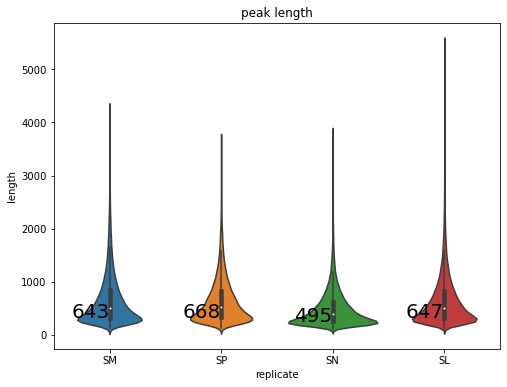

In [1]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import scikit_posthocs as sp

colnames=("chrom", "chromStart", "chromEnd", "name", "score", "strand", "signalValue", "pValue", "qValue", "peak")
df1 = pd.read_csv ("chr_Smed_combined_peaks.narrowPeak", sep = "\t", names=colnames)
df1['length']=df1['chromEnd']-df1['chromStart']
df1['replicate'] = "SM"
df1_row = df1.shape[0]
print ("SM has " + str(df1_row) + " peaks")

df2 = pd.read_csv ("chr_Spol_combined_peaks.narrowPeak", sep = "\t", names=colnames)
df2['length']=df2['chromEnd']-df2['chromStart']
df2['replicate']="SP"
df2_row = df2.shape[0]
print ("SP has " + str(df2_row) + " peaks")

df3 = pd.read_csv ("chr_Snov_combined_peaks.narrowPeak", sep = "\t", names=colnames)
df3['length']=df3['chromEnd']-df3['chromStart']
df3['replicate'] = "SN"
df3_row = df3.shape[0]
print ("SN has " + str(df3_row) + " peaks")

df4 = pd.read_csv ("chr_Slug_combined_peaks.narrowPeak", sep = "\t", names=colnames)
df4['length']=df4['chromEnd']-df4['chromStart']
df4['replicate'] = "SL"
df4_row = df4.shape[0]
print ("SL has " + str(df4_row) + " peaks")


df=pd.concat ([df1,df2,df3,df4],ignore_index=True)
df['length'] = df['length'].astype(float)
means = df.groupby('replicate')['length'].mean()
medians = df.groupby('replicate')['length'].median()
print ("Mean peak length:")
print (means)
print ("Median peak length:")
print (medians)


plt.figure(figsize=(8,6))
violin = sns.violinplot(y="length", 
               x="replicate", 
               data=df);

for i in range(len(means)):
    violin.text(i,means[i]/2, str(round(means[i])),
                fontdict=dict(color = "black", fontsize = 20),
                horizontalalignment = 'right');
violin.set_title('peak length');

scipy.stats.normaltest(df1['length'], nan_policy='propagate')
scipy.stats.normaltest(df2['length'], nan_policy='propagate')
scipy.stats.normaltest(df3['length'], nan_policy='propagate')
scipy.stats.normaltest(df4['length'], nan_policy='propagate')

scipy.stats.kruskal(df1['length'], df2['length'], df3['length'],df4['length'])

# posthoc dunn test, with correction for multiple testing
dunn_df = sp.posthoc_dunn(
    df, val_col="length", group_col="replicate", p_adjust = 'bonferroni'
)

dunn_df


In [2]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df1['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

#D’Agostino’s K^2 Test
from scipy.stats import normaltest
stat, p = normaltest(df1['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')


#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df2['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

#D’Agostino’s K^2 Test
from scipy.stats import normaltest
stat, p = normaltest(df2['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')


#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df3['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

#D’Agostino’s K^2 Test
from scipy.stats import normaltest
stat, p = normaltest(df3['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')


#Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(df4['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

#D’Agostino’s K^2 Test
from scipy.stats import normaltest
stat, p = normaltest(df4['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')


Statistics=0.809, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=20978.794, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.845, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12085.204, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.809, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=25454.899, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.820, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=30204.040, p=0.000
Sample does not look Gaussian (reject H0)


/home/mivanko/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
